<a href="https://colab.research.google.com/github/Bisan-Abuzubaida/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Auhor: Bisan Abuzubaida

## Project Overview


## Import necessary Libaraies

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
#preview the first 5 raws of the sales dataset
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#print a summary of the sales dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data


### check for duplicates

In [3]:
df_sales.duplicated().sum()

np.int64(0)

### check for unique Values

In [4]:
df_sales.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [5]:
(df_sales.nunique() / len(df_sales) * 100).sort_values(ascending= False)

,0
Item_Visibility,92.455708
Item_MRP,69.670304
Item_Outlet_Sales,40.983222
Item_Identifier,18.291681
Item_Weight,4.869178
Item_Type,0.187727
Outlet_Identifier,0.117330
Outlet_Establishment_Year,0.105597
Item_Fat_Content,0.058665
Outlet_Type,0.046932


**set an index for the dataset**

In [6]:
df_sales[['Item_Identifier', 'Outlet_Identifier']].sort_values('Item_Identifier')

,Item_Identifier,Outlet_Identifier
8043,DRA12,OUT010
118,DRA12,OUT017
1693,DRA12,OUT035
1197,DRA12,OUT045
1245,DRA12,OUT013
...,...,...
7926,NCZ54,OUT049
214,NCZ54,OUT010
1896,NCZ54,OUT027
7166,NCZ54,OUT019


In [7]:
is_unique = df_sales[['Outlet_Identifier', 'Item_Identifier']].duplicated().sum() == 0
print("Is the combination unique?", is_unique)

Is the combination unique? True


In [8]:
#another way to check
df_sales.duplicated(subset=['Outlet_Identifier', 'Item_Identifier']).sum()

np.int64(0)

In [9]:
df_sales = df_sales.set_index(['Item_Identifier', 'Outlet_Identifier'])

In [10]:
df_sales

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,OUT013,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
FDS36,OUT045,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
NCJ29,OUT035,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [11]:
df_sales.loc['FDA15']

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,
OUT049,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT045,9.3,Low Fat,0.016055,Dairy,250.2092,2002,NaN,Tier 2,Supermarket Type1,5976.2208
OUT035,9.3,Low Fat,0.016019,Dairy,248.5092,2004,Small,Tier 2,Supermarket Type1,6474.2392
OUT018,9.3,Low Fat,0.016088,Dairy,249.6092,2009,Medium,Tier 3,Supermarket Type2,5976.2208
OUT010,9.3,Low Fat,0.026818,Dairy,248.9092,1998,NaN,Tier 3,Grocery Store,498.0184
OUT013,9.3,Low Fat,0.016009,Dairy,250.6092,1987,High,Tier 3,Supermarket Type1,6474.2392
OUT027,NaN,Low Fat,0.015945,Dairy,249.5092,1985,Medium,Tier 3,Supermarket Type3,6474.2392
OUT017,9.3,LF,0.016113,Dairy,248.8092,2007,NaN,Tier 2,Supermarket Type1,5976.2208


### Handling null values

In [12]:
null_count = df_sales.isna().sum()
null_count

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


In [13]:
null_percent = null_count / len(df_sales) * 100
null_percent

,0
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000
Outlet_Type,0.000000
Item_Outlet_Sales,0.000000


In [14]:
cat_cols = df_sales.select_dtypes('object').columns
num_cols = df_sales.select_dtypes('number').columns
print(f'categorical columns \n {cat_cols}')
print(f'number columns \n {num_cols}')


categorical columns 
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
number columns 
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


**There are two columns with Null Values
one categorical column Outlet_Size and one numerical column Item_Weight**

In [15]:
# check values in Outlet_Size column
df_sales['Outlet_Size'].value_counts(dropna= False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [16]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')
df_sales['Outlet_Size'].value_counts(dropna= False)

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [17]:
##check values in Item_Weight
df_sales['Item_Weight'].value_counts(dropna= False)

,count
Item_Weight,
NaN,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


To know how to  fill the NaN in the Item Weight I want to first check if the items with the same Item_Identifier have the same Item_weight

In [18]:
df_sales.index.get_level_values('Item_Identifier').value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
FDX31,9
FDT07,9
NCY18,9
...,...
FDO33,1
FDK57,1
FDT35,1


In [19]:
# Group by Item_Identifier and check unique weights
weight_check = df_sales.groupby('Item_Identifier')['Item_Weight'].nunique()
weight_check

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,1
DRA59,1
DRB01,1
DRB13,1
...,...
NCZ30,1
NCZ41,1
NCZ42,1


In [20]:
# Items with more than one unique weight
inconsistent_items = weight_check[weight_check > 1]
print(f"Inconsistent weights found for {len(inconsistent_items)} items.")

Inconsistent weights found for 0 items.


In [21]:
# Group by Item_Identifier and check unique weights
weight_check_nan = df_sales.groupby('Item_Identifier')['Item_Weight'].nunique(dropna= False)
weight_check_nan

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,2
DRA59,2
DRB01,2
DRB13,1
...,...
NCZ30,2
NCZ41,1
NCZ42,1


In [22]:
weight_check_nan[(weight_check_nan > 2) & (weight_check_nan < 1)]

,Item_Weight
Item_Identifier,


In [23]:
df_sales.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
# Create weight map
weight_map = df_sales.groupby(level='Item_Identifier')['Item_Weight'].mean()

# Map weights to each row using index level
mapped_weights = pd.Series(
    df_sales.index.get_level_values('Item_Identifier').map(weight_map),
    index=df_sales.index
)

# Fill missing values
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(mapped_weights)

In [25]:
# check if 'Item_Weight' is no longer has NaN
df_sales['Item_Weight'].isna().sum()

np.int64(4)

In [26]:
missing_weights = df_sales[df_sales['Item_Weight'].isna()]
missing_ids = missing_weights.index.get_level_values('Item_Identifier').unique()
print("Missing Item_Identifiers:", missing_ids)

Missing Item_Identifiers: Index(['FDN52', 'FDK57', 'FDE52', 'FDQ60'], dtype='object', name='Item_Identifier')


In [27]:
df_sales.loc[missing_ids]

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDN52,OUT027,NaN,Regular,0.130933,Frozen Foods,86.9198,1985,Medium,Tier 3,Supermarket Type3,1569.9564
FDK57,OUT027,NaN,Low Fat,0.079904,Snack Foods,120.0440,1985,Medium,Tier 3,Supermarket Type3,4434.2280
FDE52,OUT027,NaN,Regular,0.029742,Dairy,88.9514,1985,Medium,Tier 3,Supermarket Type3,3453.5046
FDQ60,OUT019,NaN,Regular,0.191501,Baking Goods,121.2098,1985,Small,Tier 1,Grocery Store,120.5098


In [28]:
## the same item is filled with the same weight
df_sales.loc['FDA15']

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,
OUT049,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT045,9.3,Low Fat,0.016055,Dairy,250.2092,2002,MISSING,Tier 2,Supermarket Type1,5976.2208
OUT035,9.3,Low Fat,0.016019,Dairy,248.5092,2004,Small,Tier 2,Supermarket Type1,6474.2392
OUT018,9.3,Low Fat,0.016088,Dairy,249.6092,2009,Medium,Tier 3,Supermarket Type2,5976.2208
OUT010,9.3,Low Fat,0.026818,Dairy,248.9092,1998,MISSING,Tier 3,Grocery Store,498.0184
OUT013,9.3,Low Fat,0.016009,Dairy,250.6092,1987,High,Tier 3,Supermarket Type1,6474.2392
OUT027,9.3,Low Fat,0.015945,Dairy,249.5092,1985,Medium,Tier 3,Supermarket Type3,6474.2392
OUT017,9.3,LF,0.016113,Dairy,248.8092,2007,MISSING,Tier 2,Supermarket Type1,5976.2208


In [29]:
#Fill Remaining NaNs with Global Mean
global_mean = df_sales['Item_Weight'].mean()
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(global_mean)

In [30]:
df_sales['Item_Weight'].isna().sum()

np.int64(0)

***Now all the missing values has been handled***

### checking for inconsistency

In [31]:
cat_cols = df_sales.select_dtypes('object').columns
for col in cat_cols:
  print(df_sales[col].value_counts(),'\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64 

Outlet_Size
Medium     2793
MISSING    2410
Small      2388
High        932
Name: count, dtype: int64 

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64 

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64 



In [32]:
# handle incosistency in Item_Fat_Content column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat': 'Low Fat' })
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [33]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
fpath_out = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023_cleaned.csv'
df_sales.to_csv(fpath_out,index= True ,index_label=['Item_Identifier', 'Outlet_Identifier'])

In [35]:
loaded = pd.read_csv(fpath_out, index_col=['Item_Identifier', 'Outlet_Identifier'])
loaded.index

MultiIndex([('FDA15', 'OUT049'),
            ('DRC01', 'OUT018'),
            ('FDN15', 'OUT049'),
            ('FDX07', 'OUT010'),
            ('NCD19', 'OUT013'),
            ('FDP36', 'OUT018'),
            ('FDO10', 'OUT013'),
            ('FDP10', 'OUT027'),
            ('FDH17', 'OUT045'),
            ('FDU28', 'OUT017'),
            ...
            ('FDH31', 'OUT035'),
            ('FDA01', 'OUT045'),
            ('FDH24', 'OUT018'),
            ('NCJ19', 'OUT018'),
            ('FDF53', 'OUT046'),
            ('FDF22', 'OUT013'),
            ('FDS36', 'OUT045'),
            ('NCJ29', 'OUT035'),
            ('FDN46', 'OUT018'),
            ('DRG01', 'OUT046')],
           names=['Item_Identifier', 'Outlet_Identifier'], length=8523)

In [36]:
loaded.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [74]:
fpath_out = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023_cleaned.csv'

df = pd.read_csv(fpath_out, index_col=['Item_Identifier', 'Outlet_Identifier'])

In [37]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Histograms to view the distributions of numerical features in your dataset.

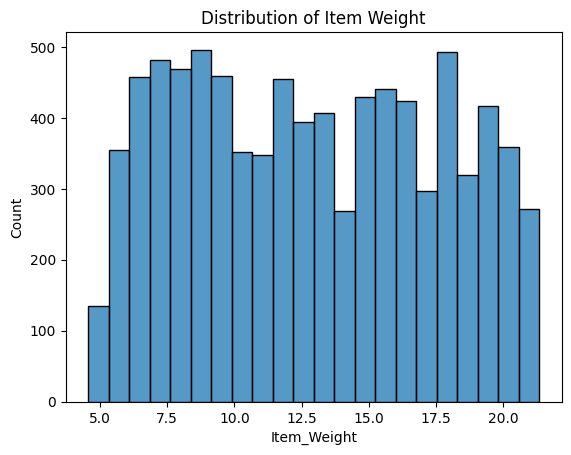

In [75]:
ax  = sns.histplot(data= df, x='Item_Weight')
ax.set_title('Distribution of Item Weight');

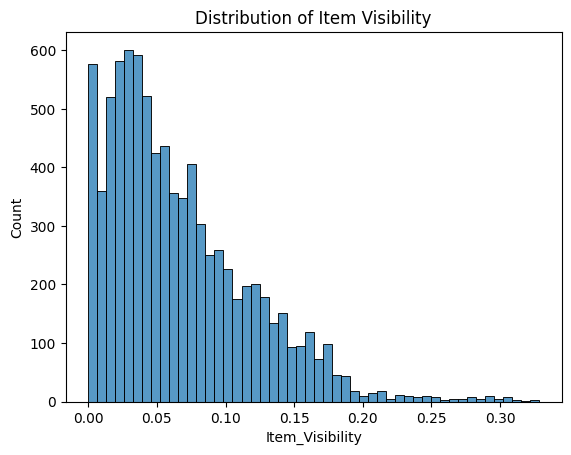

In [77]:
ax = sns.histplot(data= df, x='Item_Visibility')
ax.set_title('Distribution of Item Visibility');


```
- Most products take up very little space on store shelves — less than 5% of the total display area.
- A lot of products have almost zero visibility, which might mean:
- They’re not currently displayed
- They’re just listed in the system but not shown
- Or there could be some missing or incorrect data
- Only a few products take up a large amount of shelf space, which means most of the attention goes to a small group of items.

```

In [165]:
df['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.061271,2
0.046825,2
0.112399,2
...,...
0.054142,1
0.018920,1
0.044974,1


In [168]:
df.loc[df['Item_Visibility'] == 0, 'Item_Outlet_Sales']

,,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,
FDX07,OUT010,732.3800
NCD19,OUT013,994.7052
FDP36,OUT018,556.6088
FDY07,OUT049,1516.0266
FDP33,OUT018,3068.0064
...,...,...
FDQ58,OUT019,459.4020
DRJ49,OUT013,2324.9736
FDR20,OUT010,45.2744


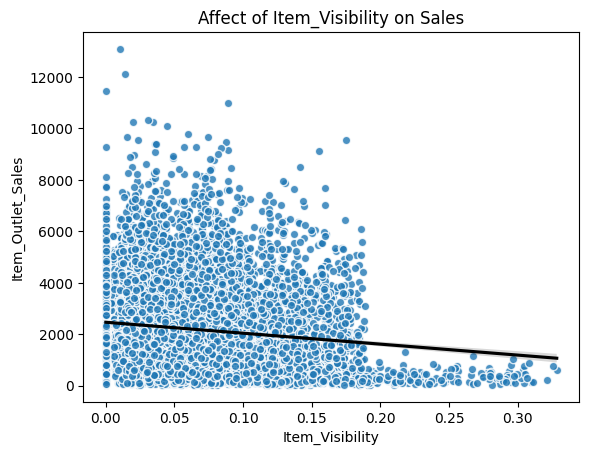

In [169]:
line_kws = dict(color = 'black')
scatter_kws = dict(edgecolor = 'white')
ax = sns.regplot(data= df, x='Item_Visibility', y='Item_Outlet_Sales', line_kws= line_kws, scatter_kws= scatter_kws)
ax.set_title('Affect of Item_Visibility on Sales');

```
Zero Visibility but Still Selling
- Products with 0% visibility are still being sold — some with very high sales.
- This means that visibility = 0 probably doesn’t mean the product wasn’t displayed. It could be:
- A missing value or placeholder
- A data entry issue
- Or maybe visibility wasn’t recorded properly for those items
```


- The weak negative trend suggests that more visibility doesn’t always mean more sales — maybe because popular products sell well even with small shelf space.
-  Visibility might interact with other features like Item_Type or Outlet_Type. You could explore combined effects.


In [170]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [171]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


/tmp/ipython-input-3188942077.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize= 30)
/tmp/ipython-input-3188942077.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], fontsize=30)


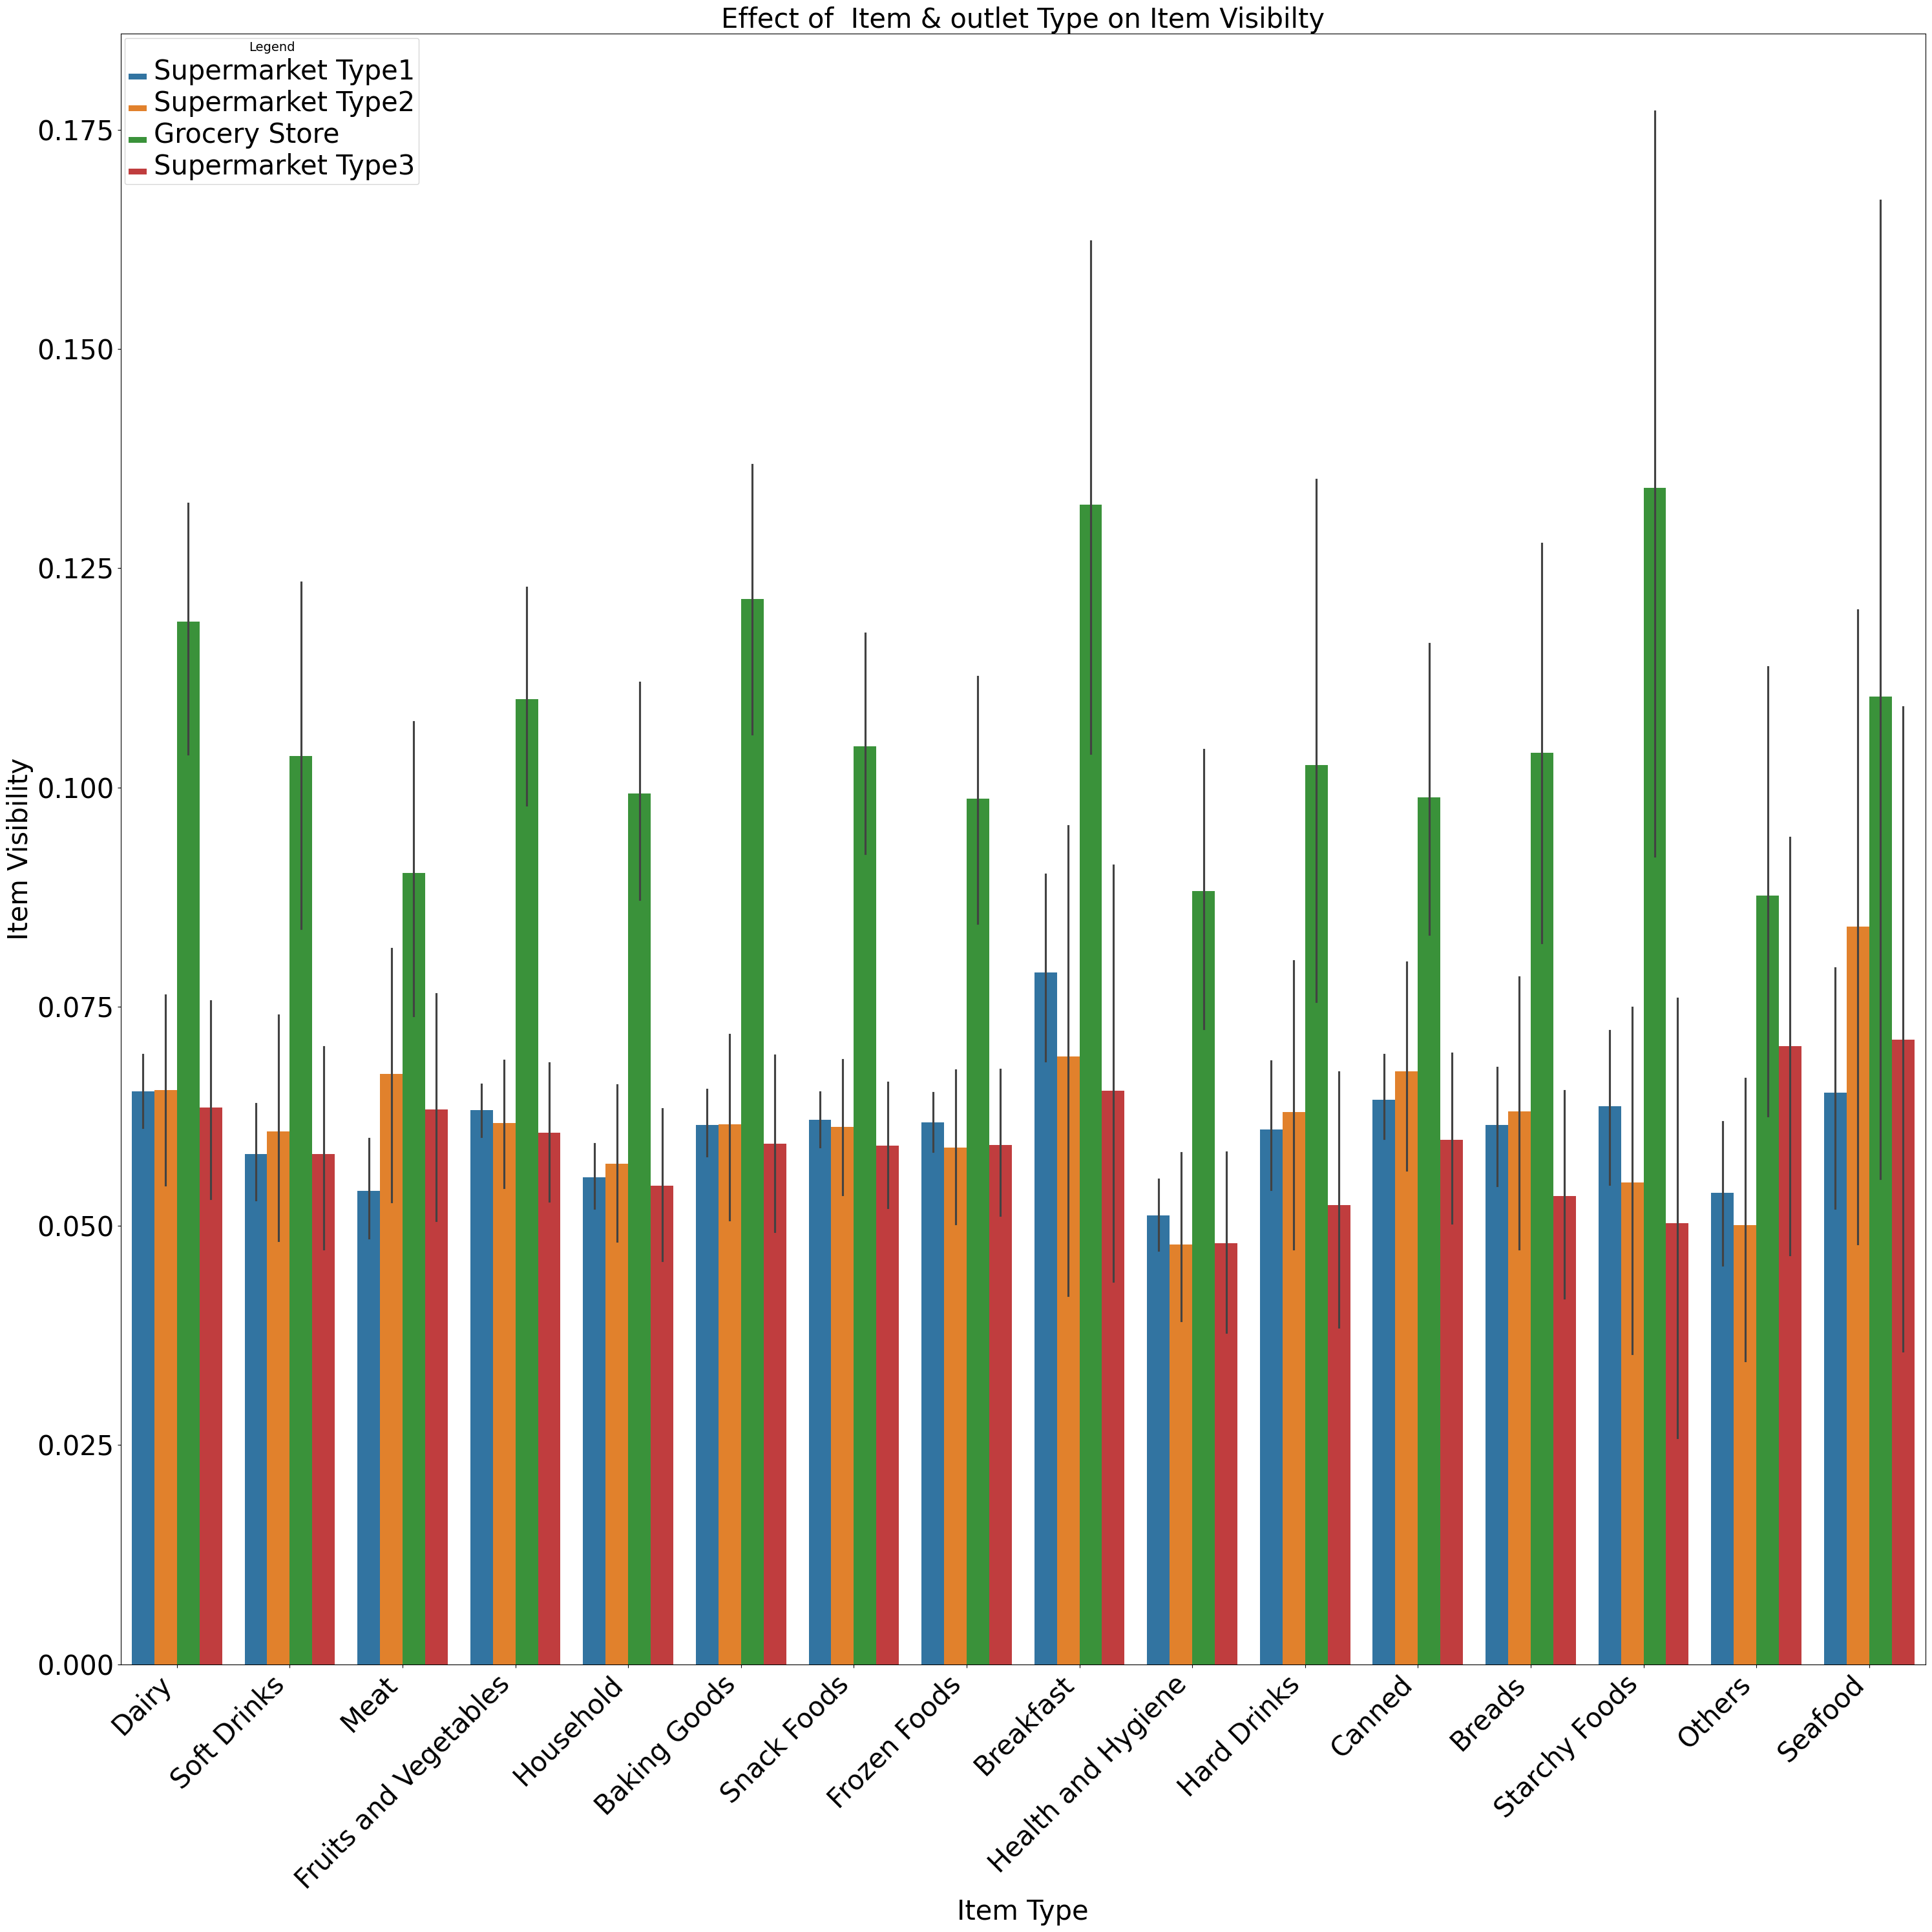

In [189]:
fig, ax= plt.subplots(figsize=(30,30))
sns.barplot(data= df, x= 'Item_Type', y= 'Item_Visibility', hue= 'Outlet_Type', ax= ax)

ax.set_title('Effect of  Item & outlet Type on Item Visibilty', fontsize= 30);
ax.set_xlabel('Item Type', fontsize= 30)
ax.set_ylabel('Item Visibility', fontsize= 30)

# Rotate x-axis labels for better readability (optional)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize= 30)
ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], fontsize=30)

legend = ax.get_legend()
if legend:
    legend.set_title('Legend', prop={'size': 14})
    for text in legend.get_texts():
        text.set_fontsize(30)

# Adjust layout
fig.tight_layout();


```
- Grocery Stores may prioritize product visibility more aggressively — possibly due to smaller layouts or focused product placement.
- Supermarkets, especially Type1 and Type2, might have broader assortments or larger spaces, which can dilute individual item visibility.
- The variation across item types is less pronounced than the variation across outlet types — outlet type seems to be the stronger factor.
```

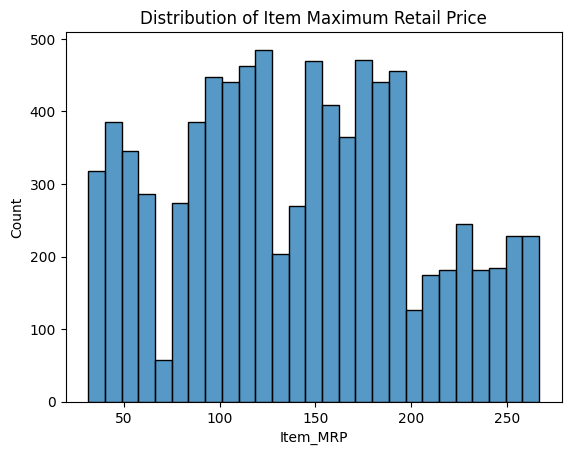

In [80]:
ax = sns.histplot(data= df, x='Item_MRP')
ax.set_title('Distribution of Item Maximum Retail Price');


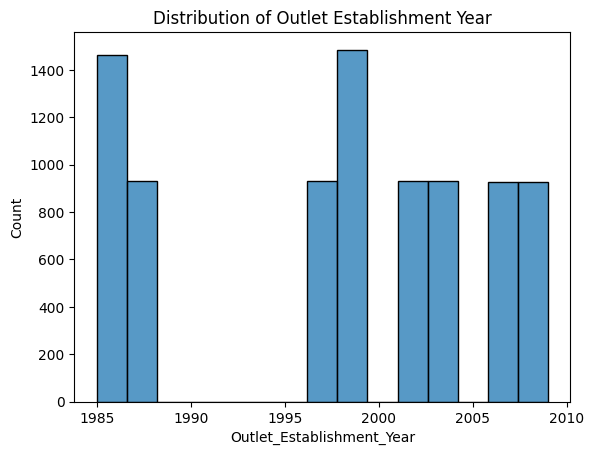

In [81]:
ax = sns.histplot(data= df, x='Outlet_Establishment_Year')
ax.set_title('Distribution of Outlet Establishment Year');


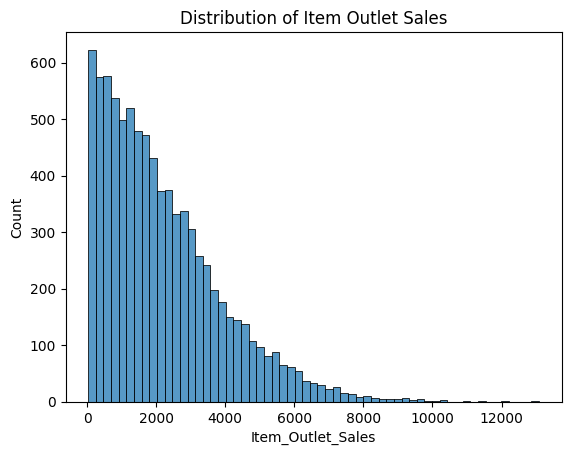

In [83]:
ax = sns.histplot(data= df, x='Item_Outlet_Sales')
ax.set_title('Distribution of Item Outlet Sales');


### Boxplots to view statistical summaries of numerical features in your dataset.


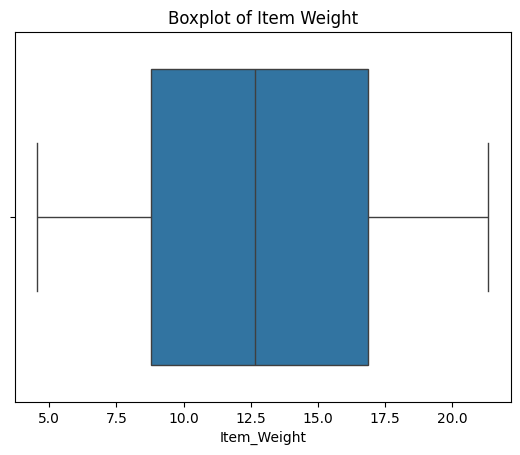

In [84]:
ax = sns.boxplot(data= df, x='Item_Weight')
ax.set_title('Boxplot of Item Weight');

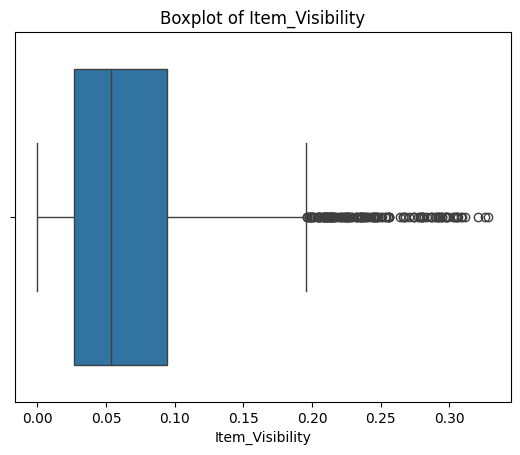

In [85]:
ax = sns.boxplot(data= df, x='Item_Visibility')
ax.set_title('Boxplot of Item_Visibility');

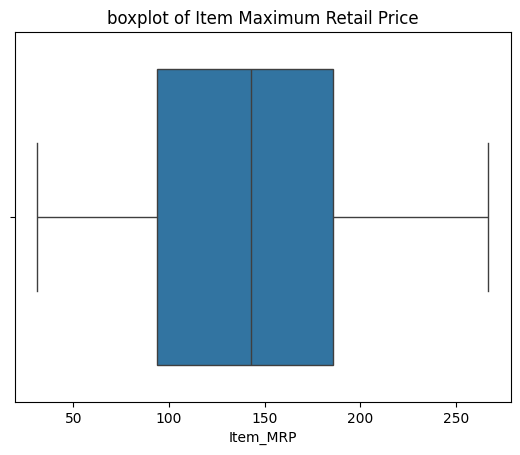

In [86]:
ax= sns.boxplot(data= df, x='Item_MRP')
ax.set_title('boxplot of Item Maximum Retail Price');

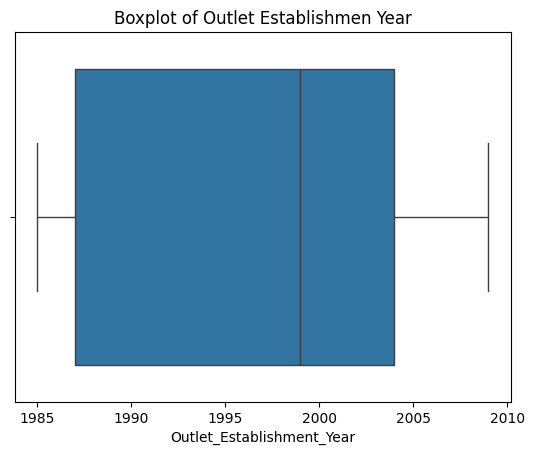

In [87]:
ax= sns.boxplot(data= df, x='Outlet_Establishment_Year')
ax.set_title('Boxplot of Outlet Establishmen Year');

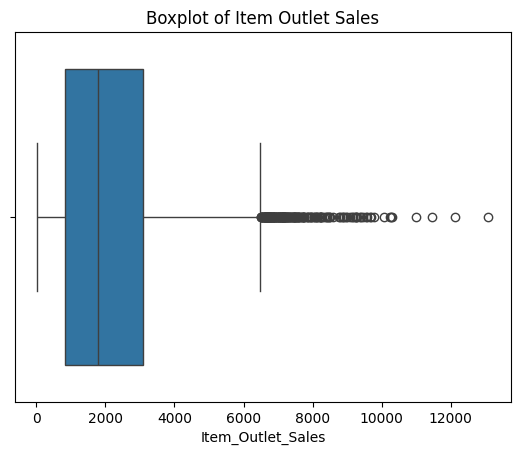

In [88]:
ax= sns.boxplot(data= df, x='Item_Outlet_Sales')
ax.set_title('Boxplot of Item Outlet Sales');

### Heatmap to view the correlation between features.

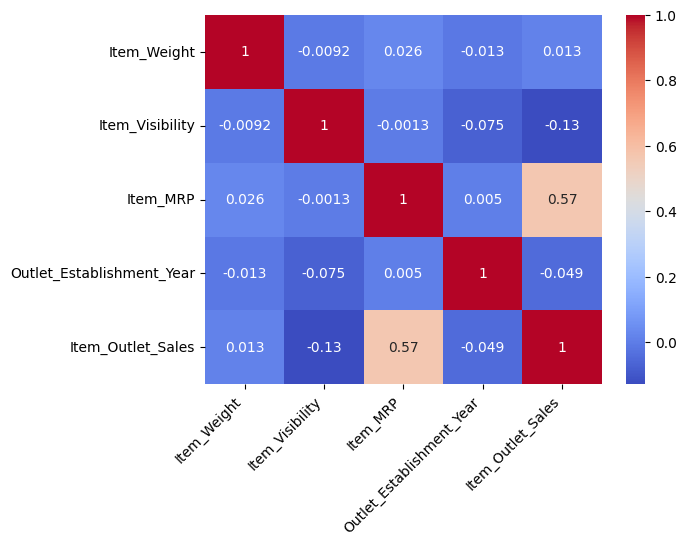

In [108]:
corr = df_sales.corr(numeric_only= True)
ax = sns.heatmap(corr, cmap= 'coolwarm',annot= True)
ax.set_xticklabels(ax.get_xticklabels(),rotation= 45, ha='right');

there is a medium positive correlation between Item MRP & Item Outlet Sales

### Countplots to view the frequency of each class of categorial features in your dataset.


In [89]:
df.select_dtypes('object').columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

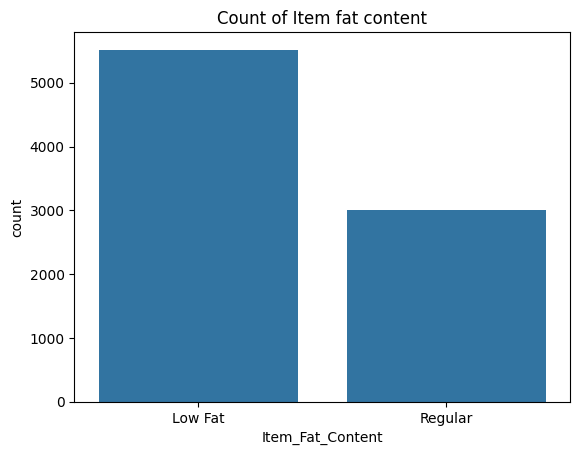

In [91]:
ax = sns.countplot(data= df, x= 'Item_Fat_Content')
ax.set_title('Count of Item fat content');

/tmp/ipython-input-2326302522.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');


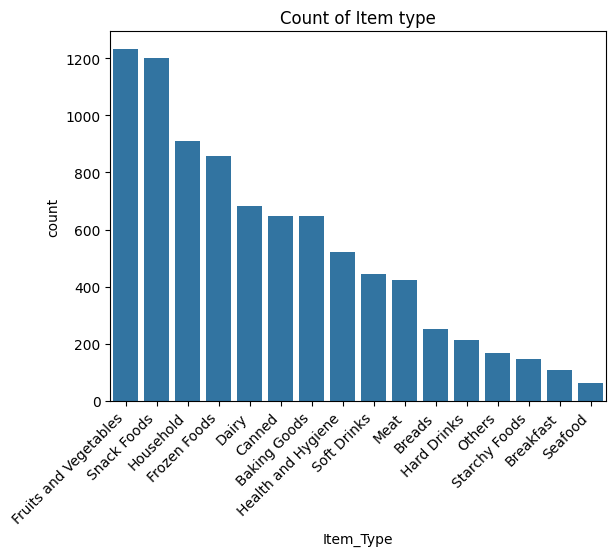

In [98]:
ax = sns.countplot(data= df, x= 'Item_Type', order= df.Item_Type.value_counts().index)
ax.set_title('Count of Item type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');

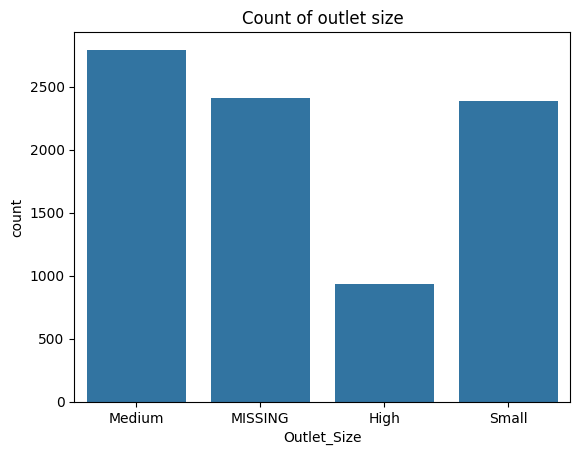

In [94]:
ax = sns.countplot(data= df, x= 'Outlet_Size')
ax.set_title('Count of outlet size');

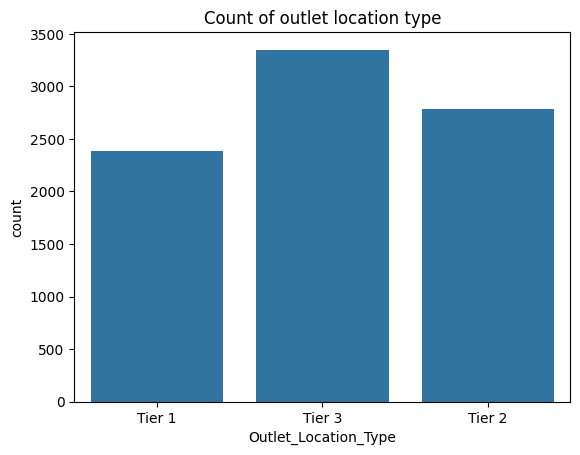

In [95]:
ax = sns.countplot(data= df, x= 'Outlet_Location_Type')
ax.set_title('Count of outlet location type');

/tmp/ipython-input-3511309572.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');


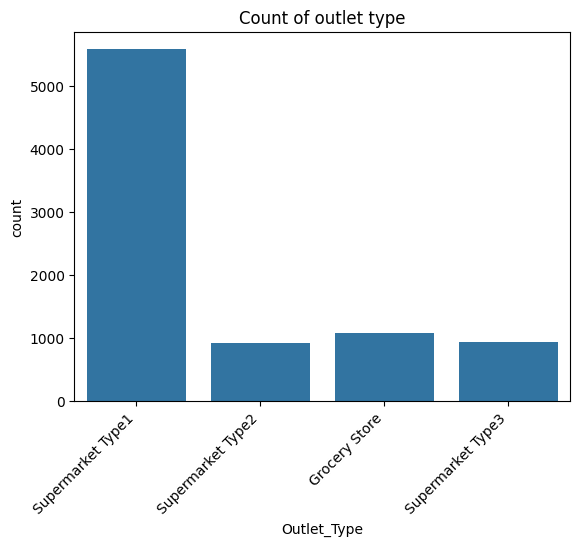

In [99]:
ax = sns.countplot(data= df, x= 'Outlet_Type')
ax.set_title('Count of outlet type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');

### Multivariate plots

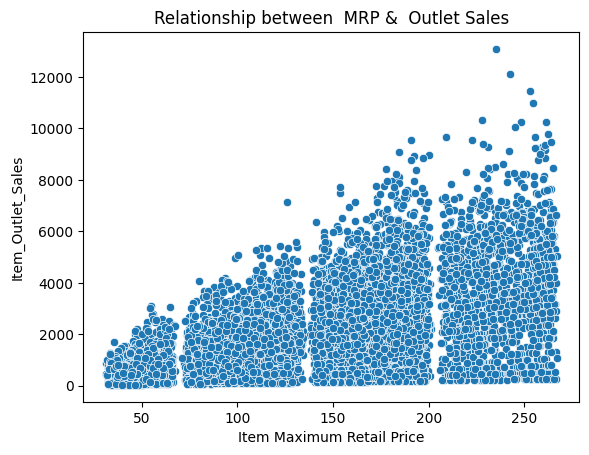

In [122]:
ax = sns.scatterplot(data= df, x='Item_MRP', y='Item_Outlet_Sales')
ax.set_xlabel('Item Maximum Retail Price')
ax.set_title('Relationship between  MRP &  Outlet Sales');

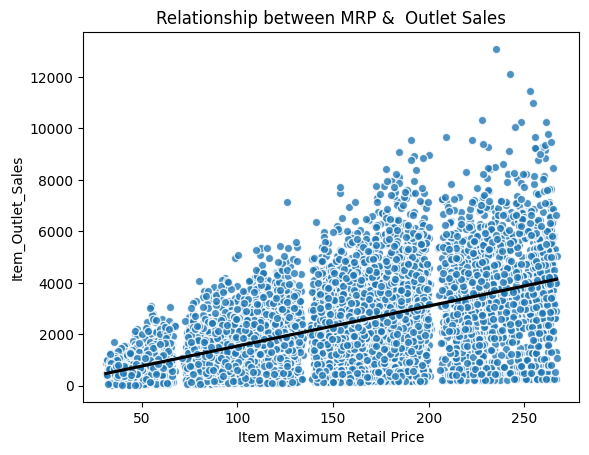

In [123]:
line_kws= dict(color='black')
scatter_kws= dict(edgecolor='white')
ax= sns.regplot(data= df, x='Item_MRP', y='Item_Outlet_Sales', line_kws= line_kws, scatter_kws= scatter_kws)
ax.set_xlabel('Item Maximum Retail Price')
ax.set_title('Relationship between MRP &  Outlet Sales');


**A pairplot is one of the most powerful visual tools in seaborn for exploring relationships between numerical features. It creates a grid of scatterplots for every pair of numerical columns, along with histograms (or KDEs) on the diagonal.**


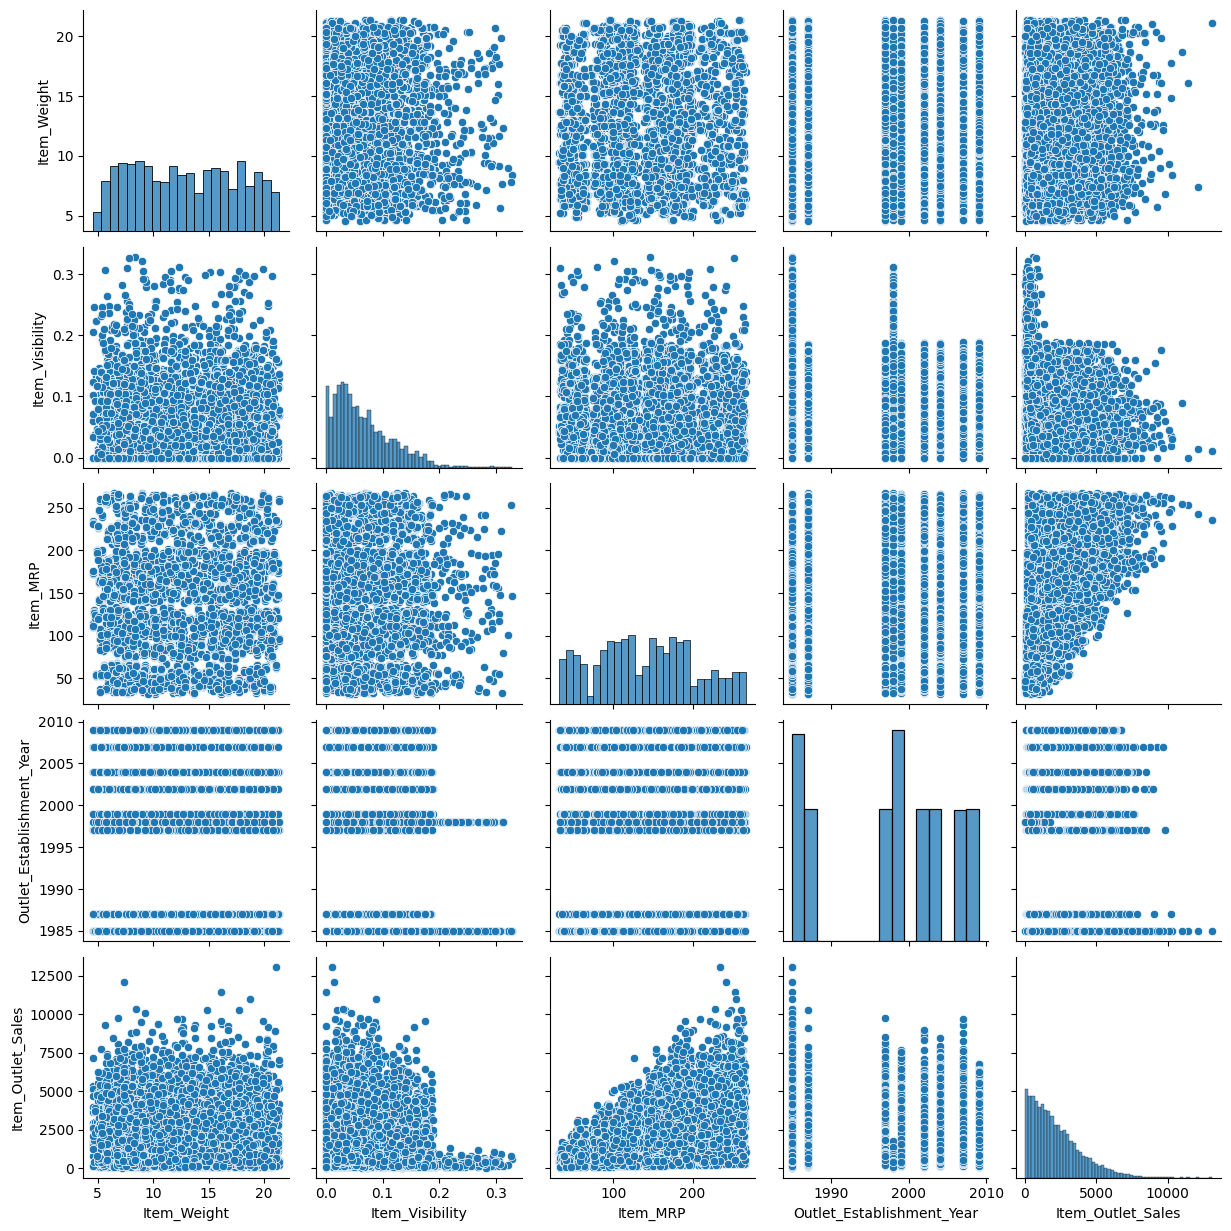

In [140]:
ax = sns.pairplot(df[num_cols])

In [124]:
df.select_dtypes('object').columns.to_list()

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

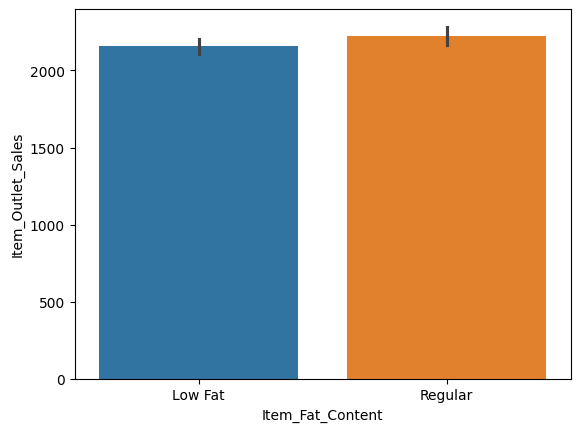

In [133]:
ax = sns.barplot(data= df, x= 'Item_Fat_Content', y='Item_Outlet_Sales', hue= 'Item_Fat_Content')

/tmp/ipython-input-2865324922.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right');


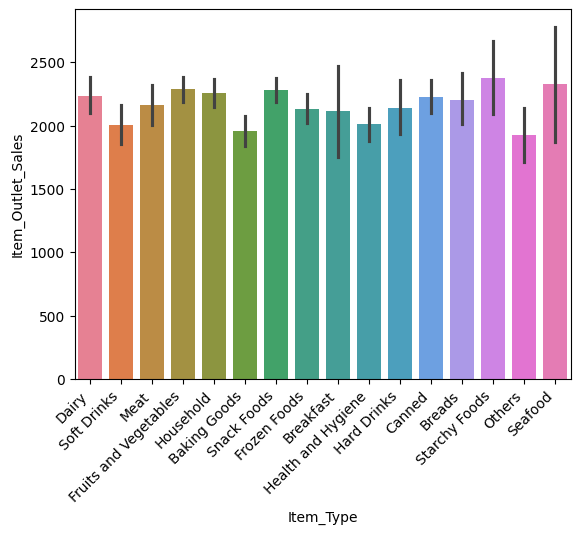

In [136]:
ax = sns.barplot(data= df, x= 'Item_Type', y='Item_Outlet_Sales', hue= 'Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right');

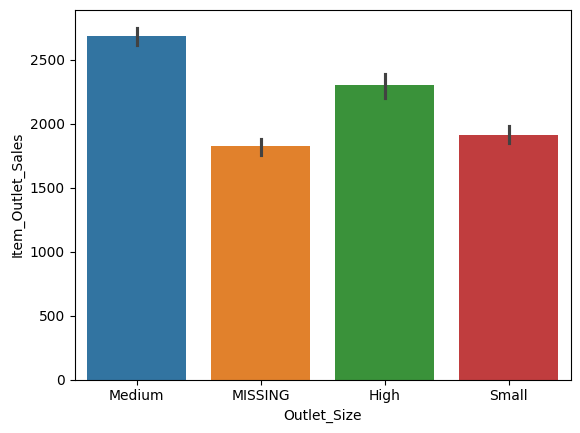

In [137]:
ax = sns.barplot(data= df, x= 'Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size');

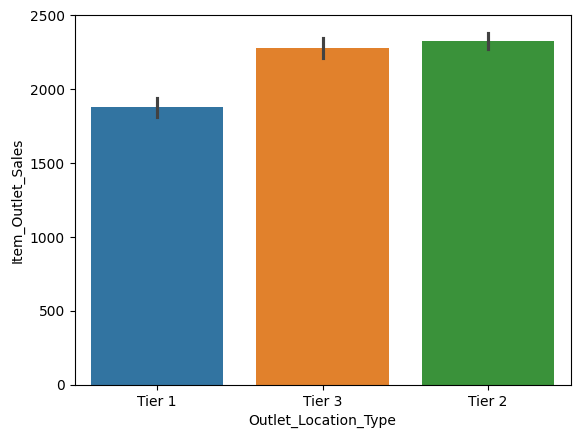

In [138]:
ax = sns.barplot(data= df, x= 'Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type');

/tmp/ipython-input-2386239054.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 30, ha= 'right');


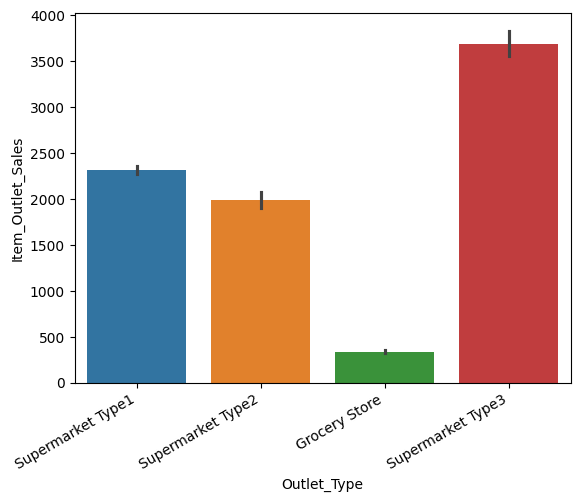

In [139]:
ax = sns.barplot(data= df, x= 'Outlet_Type', y='Item_Outlet_Sales', hue= 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 30, ha= 'right');

Time Analysis: Outlet_Establishment_Year
Goal: Explore how the age of the outlet affects sales.


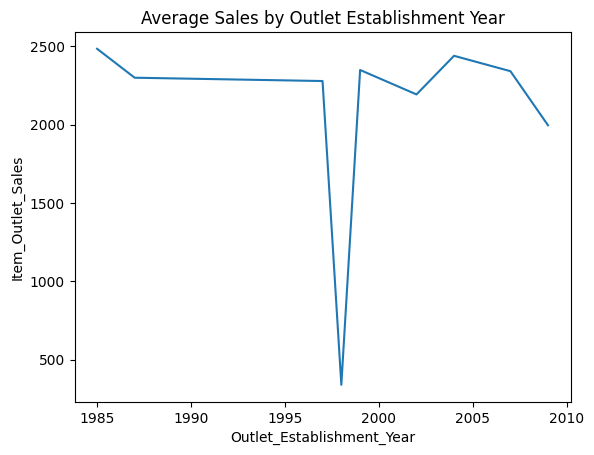

In [142]:
# Lineplot: Average sales by year
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index()
ax = sns.lineplot(data=sales_by_year, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
ax.set_title('Average Sales by Outlet Establishment Year');


/tmp/ipython-input-2756209732.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


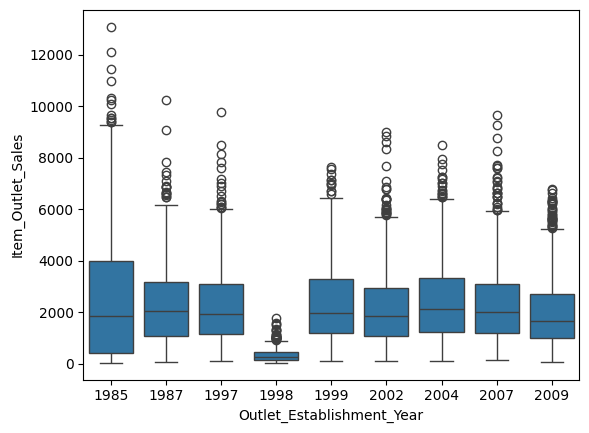

In [145]:
# Boxplot: Distribution of sales by year
sns.boxplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Sales Distribution by Establishment Year');

Grouped Boxplot


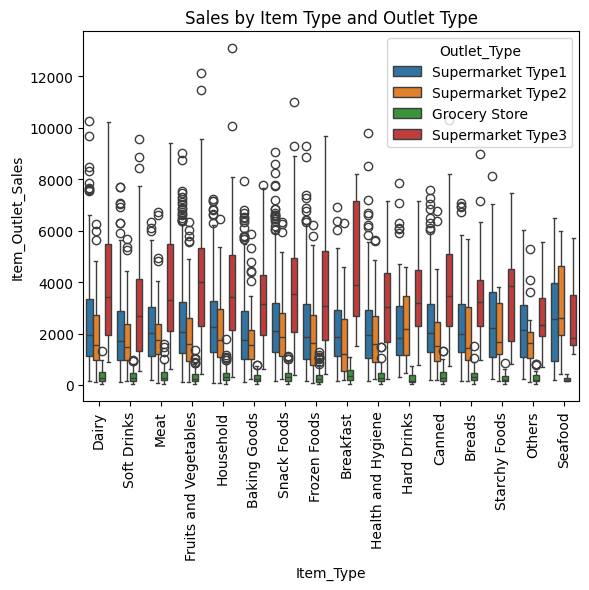

In [146]:
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.xticks(rotation=90)
plt.title('Sales by Item Type and Outlet Type')
plt.show()

Grouped Barplot (Mean Sales)


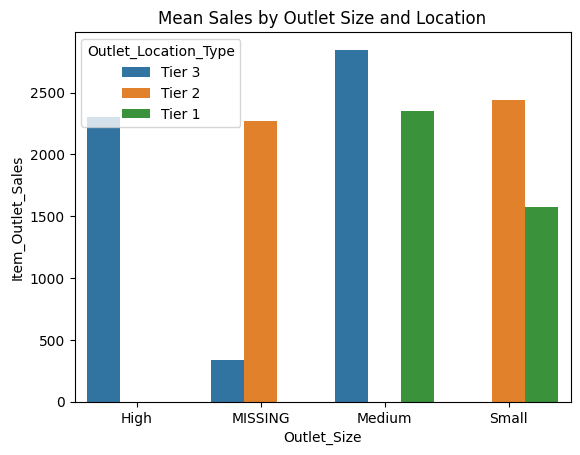

In [147]:
grouped = df.groupby(['Outlet_Size', 'Outlet_Location_Type'])['Item_Outlet_Sales'].mean().reset_index()
sns.barplot(data=grouped, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Location_Type')
plt.title('Mean Sales by Outlet Size and Location')
plt.show()

***FacetGrid: Compare Distributions Across Categories
Goal: See how a numerical feature behaves across different categories. italicized text***

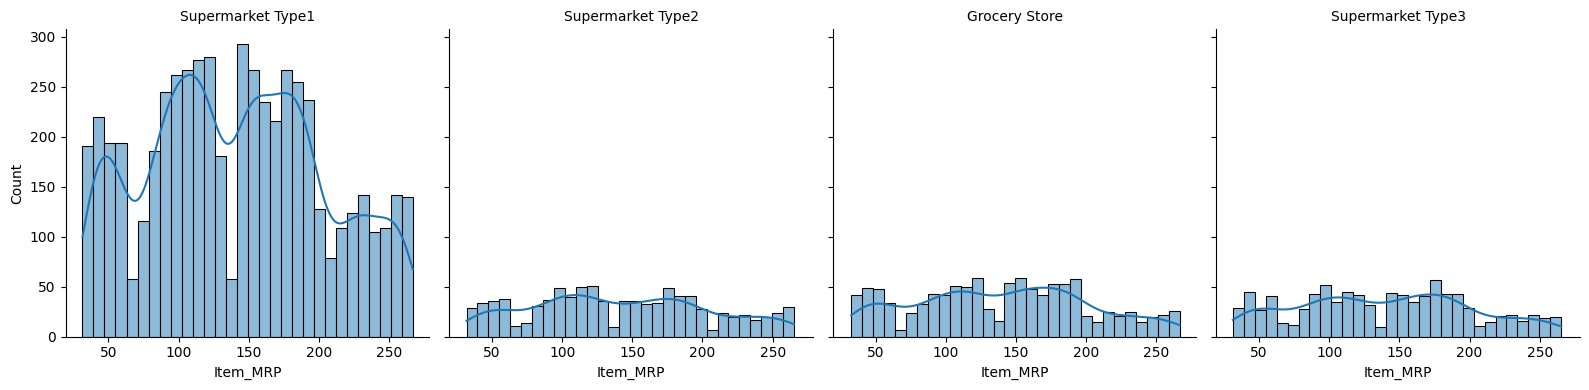

In [149]:
# Distribution of Item_MRP across Outlet_Type
g = sns.FacetGrid(df, col='Outlet_Type', height=4, aspect=1)
g.map(sns.histplot, 'Item_MRP', bins=30, kde=True)
g.set_titles('{col_name}')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


AttributeError: 'numpy.ndarray' object has no attribute 'set_xticklabels'

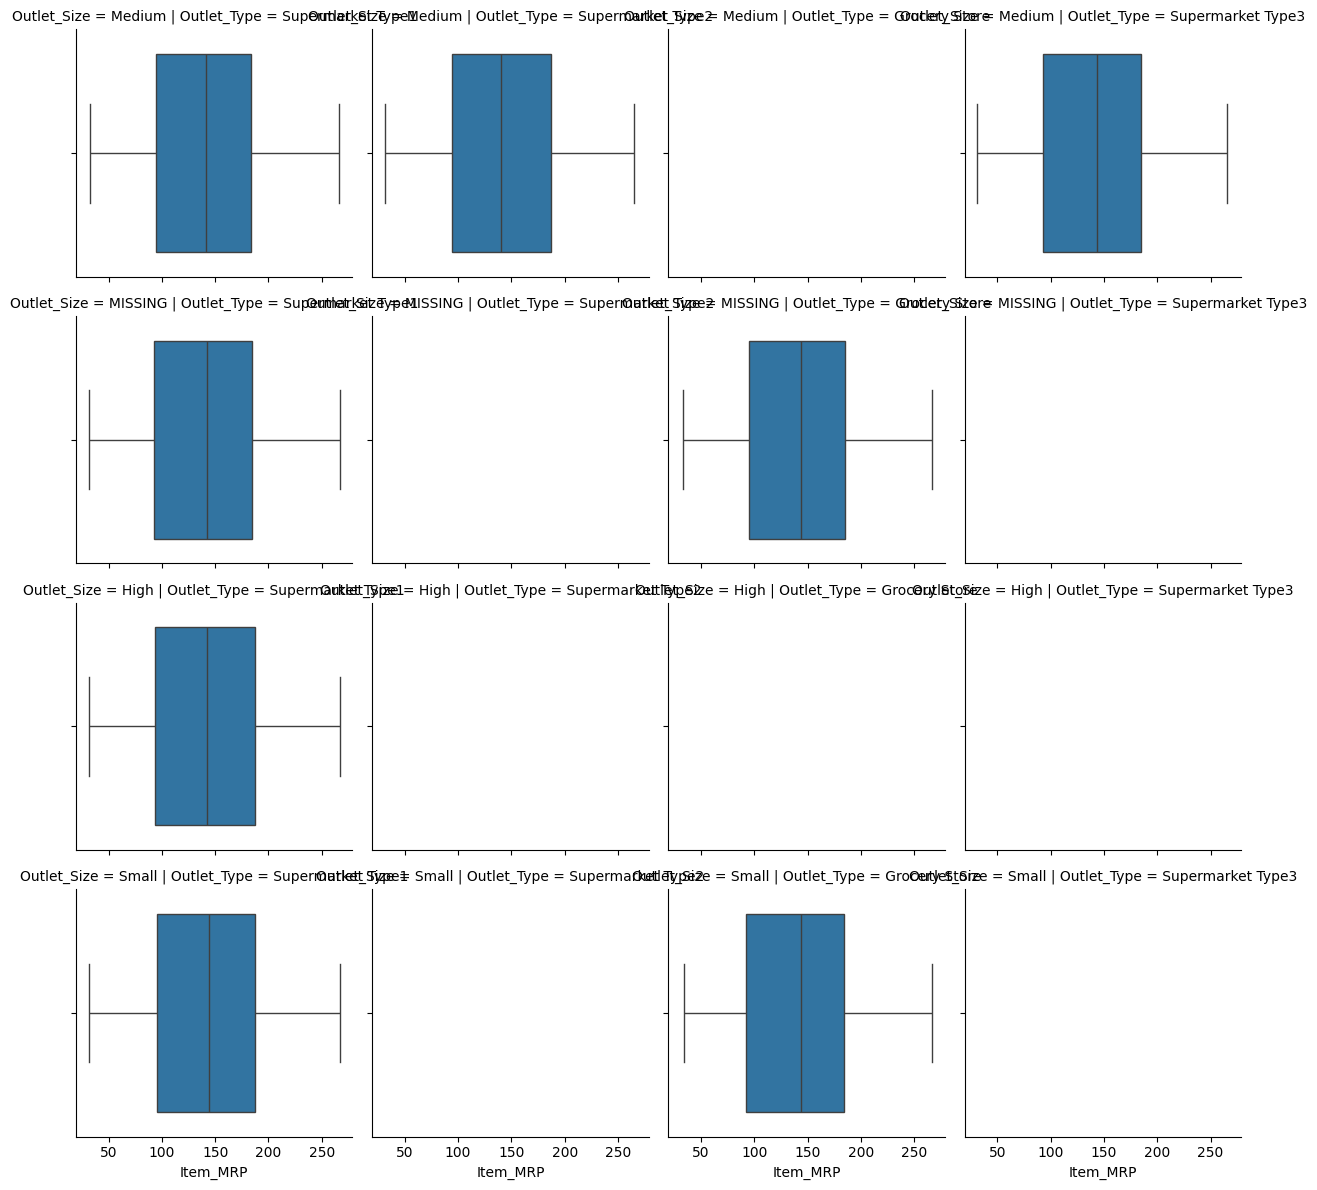

In [151]:
g = sns.FacetGrid(df, row='Outlet_Size', col='Outlet_Type', height=3)
g.map(sns.boxplot, 'Item_MRP')
g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation= 45, ha='right')
plt.show()

Feature-Target Relationship by Outlet Characteristics
Item_Outlet_Sales by Outlet_Size, Outlet_Location_Type

In [ ]:
ax= sns.catplot(kind= 'swarm', data= df, x='Outlet_Size' , y='Item_Outlet_Sales', hue= 'Outlet_Location_Type', s=1)
ax.set_title('Affect of Outlet Size and Location Type on Sales');

## Feature Inspection